1.60E+10
4.32E+13
5.40E+3
2700.0
2.00E+0
Rate is 32000000000.0
Rate is 64000000000.0


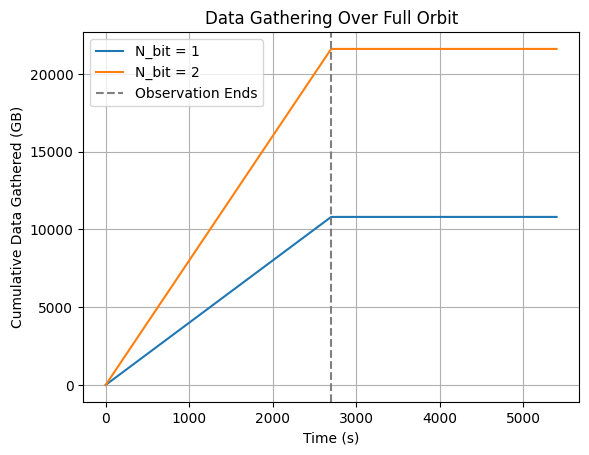

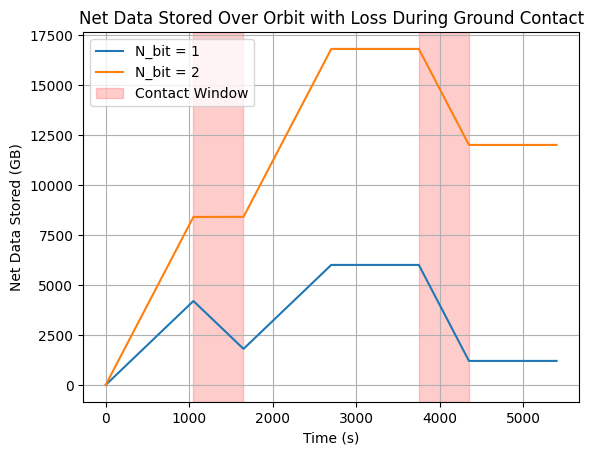

In [ ]:

from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

N_pol = 1
N_Nyquist = 2
freq_Bandwidth = 8e9
N_bit = 1

T_orbit = 90 * 60 # 90 Min Orbital Period in LEO (convert to seconds)
frac_observe = .50
T_observe = frac_observe * T_orbit

rate = N_bit * freq_Bandwidth * N_pol * N_Nyquist
totalBits = rate * T_observe
totalGB = totalBits / (8e9) # Convert from Bits to Gigabytes
totalGB_sec = totalGB / T_observe

print("{:.2E}".format(Decimal(rate)))
print("{:.2E}".format(Decimal(totalBits)))
print("{:.2E}".format(Decimal(totalGB)))
print(T_observe)
print("{:.2E}".format(Decimal(totalGB_sec)))


N_pol = 2
N_Nyquist = 2
freq_Bandwidth = 8e9
T_orbit = 90 * 60      # seconds (5400)
frac_observe = 0.50
T_observe = frac_observe * T_orbit  # 2700 seconds

# Time axis
time = np.linspace(0, T_orbit, 1000)  # seconds

plt.figure()
for N_bit in [1, 2]:
    rate = N_bit * freq_Bandwidth * N_pol * N_Nyquist #bits
    print("Rate is", rate)
    cumulative_gb = np.where(
        time <= T_observe,
        (rate * time) / (8e9),
        (rate * T_observe) / (8e9)
    )
    plt.plot(time, cumulative_gb, label=f'N_bit = {N_bit}')

plt.xlabel('Time (s)')
plt.ylabel('Cumulative Data Gathered (GB)')
plt.title('Data Gathering Over Full Orbit')
plt.axvline(T_observe, color='gray', linestyle='--', label='Observation Ends')
plt.legend()
plt.grid(True)
plt.savefig('DataBHEXMini.png', dpi=600)

#PLOT 2


N_pol = 2
N_Nyquist = 2
freq_Bandwidth = 8e9  # Hz
T_orbit = 90 * 60      # seconds (5400s)
frac_observe = 0.50
T_observe = frac_observe * T_orbit  # seconds (2700s)
loss_rate = 64e9      # bits per second loss during contact
window_duration = 10 * 60  # 10 minutes

# contact windows
start1 = T_orbit * 0.25 - window_duration/2
start2 = T_orbit * 0.75 - window_duration/2
windows = [(start1, start1 + window_duration), (start2, start2 + window_duration)]

# Time axis
time = np.linspace(0, T_orbit, 2000)

plt.figure()
for N_bit in [1, 2]:
    # Cumulative data gathered (GB)
    rate = N_bit * freq_Bandwidth * N_pol * N_Nyquist
    gathered = np.where(
        time <= T_observe,
        rate * time,
        rate * T_observe
    ) / 8e9

    # Cumulative lost data (GB)
    lost_time = sum(np.clip(time - start, 0, window_duration) for start, _ in windows)
    lost = (loss_rate * lost_time) / 8e9

    # Net data (GB)
    net = gathered - lost
    plt.plot(time, net, label=f'N_bit = {N_bit}')

# Plot contact windows
for start, end in windows:
    plt.axvspan(start, end, color='red', alpha=0.2, label='Contact Window' if start == start1 else "")

plt.xlabel('Time (s)')
plt.ylabel('Net Data Stored (GB)')
plt.title('Net Data Stored Over Orbit with Loss During Ground Contact')
plt.legend()
plt.grid(True)

